In [1]:
import pandas as pd


In [3]:
df=pd.read_csv("House.csv");
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [4]:
x=df[['RM']].values
y=df[['MEDV']].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [6]:
#APPLY LINEAR REGRESSION

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Y1=lr.predict(x_train)
Y2=lr.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
print("Training error",mean_squared_error(Y1,y_train))
print("Testing error",mean_squared_error(Y2,y_test))



Training error 45.56903129057994
Testing error 39.84752194988013


In [24]:
from sklearn.metrics import r2_score
print(r2_score(Y1,y_train))
print(r2_score(Y2,y_test))

-0.2413551873748816
-0.1739214758676546


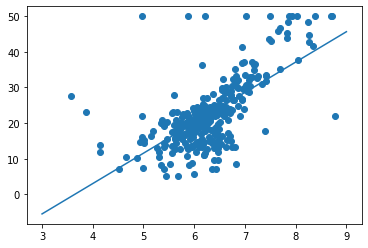

In [38]:
import numpy as np
x1=np.arange(3,10,1)[:,np.newaxis]#x1 hh jo 2D data hona chahiye tabhi array liya taki 1D array se 2D array m convert kr ske
y3=lr.predict(x1)

import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)#scatter m dots aati hh
plt.plot(x1,y3)
#plt.plot(x_train,y_train)
plt.show()

In [ ]:
#we can use RANSAC to improve the accuracy that has proper steps to do the same

In [26]:
from sklearn.linear_model import RANSACRegressor #divide data into inliers and outliers

In [31]:
ra=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50)
ra.fit(x_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50,
                random_state=None, residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [40]:
ra1=ra.predict(x_train)
ra2=ra.predict(x_test)
print("Training Error",mean_squared_error(ra1,y_train))
print("Testing Error",mean_squared_error(ra2,y_test))
print("Training Accuracy",r2_score(ra1,y_train))
print("Testing Accuracy",r2_score(ra2,y_test))

Training Error 46.43398305383391
Testing Error 39.22660718585092
Training Accuracy -0.07369955147545393
Testing Accuracy 0.019067684951252106


In [41]:
#to check what are inlier and outlier
inlier=ra.inlier_mask_ #return boolean values
inlier #true wali  values inliers hh 

array([False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,

In [42]:
outlier=np.logical_not(inlier)
outlier

array([ True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False,